
# Non-Parametric Density Estimation

Here we do not assume any functional form for the density. In the parametric density estimation, we assume a particular form   for   the   density   function   and   then   estimate   the   parameters.   Whereas,   in   the non parametric form we do not assume any form for the density function; and still we need to have density estimate.


 the   basic   idea   is   to   estimate   the   density   by:
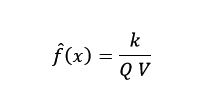
where V is The volume of a smalle region around   x   in   which k out   of   the   n  data   samples   are   found in that region, while n is the total number of data sample.

the choice   of   V   is   quite   critical for getting good estimation.
there are two possible:


1. fix v and compute k (Parzen window or kernal desity estimation)

2. fix k and compute v  ( K_nearest neighbour density estimation)

### Parzen window estimation

on every data point Xi, we place a kernal function K, the kernal density estimate is:
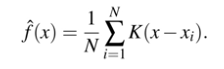

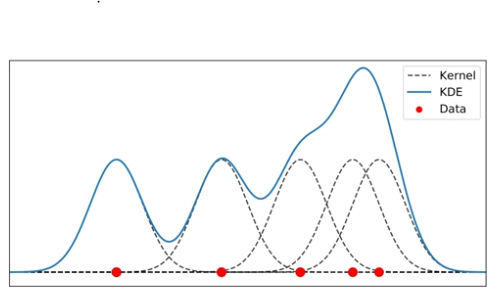

Kernel density estimation in scikit-learn is implemented in the sklearn.neighbors.KernelDensity estimator,
sklearn.neighbors.KernelDensity implements several common kernel forms, which are shown in the following figure:
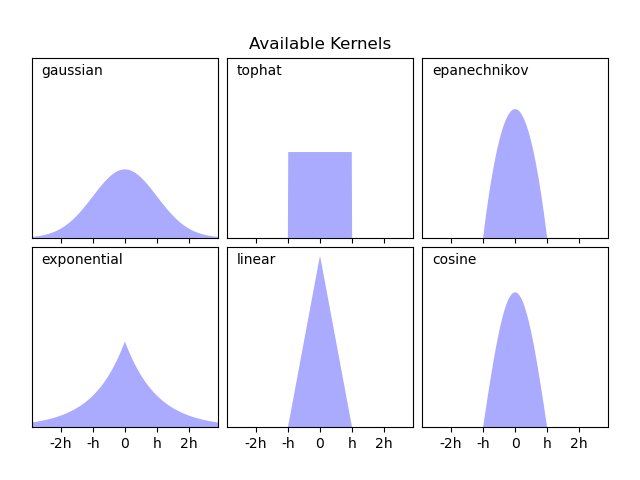

lets make a random data

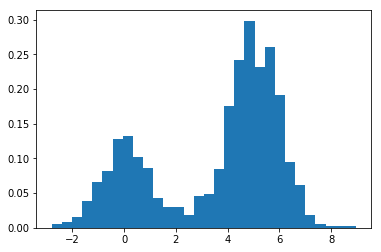

In [17]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)


hist = plt.hist(x, bins=30, normed=True)

(-0.02, 0.22)

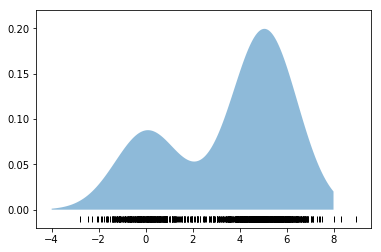

In [21]:
x_d = np.linspace(-4, 8, 1000)

from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)



(-0.02, 0.22)

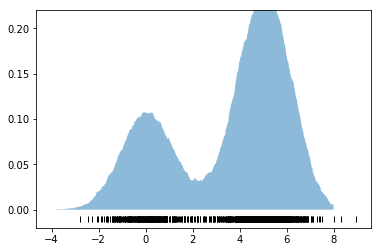

In [25]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='tophat')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

### K_nearest neighbour density estimation

Here we dont have to chose the size parameter,h,

instead we chose k and find V to enclose the K nearest neighbour of x.

so we first choose k, so given an x I will ask where is the k th nearest neighbour and we draw a sphere a hyper sphere to just include the k th nearest neighbour, its radius will be the distance from x to the k th nearest neighbour that will be the value of V and then this will be k nearest neighbour   density   estimate.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

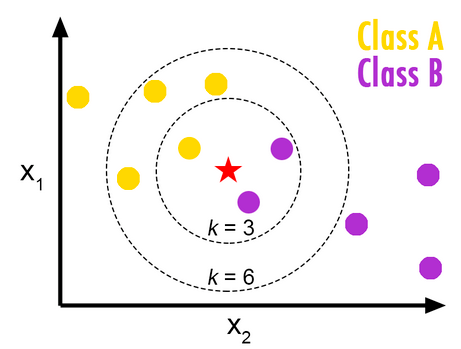

In [50]:
from sklearn.datasets import load_iris
import pandas as pd
X, y = load_iris(return_X_y=True)
(pd.DataFrame(X)).head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.95      1.00      0.97        18
          2       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        45



Calculating error for K values between 1 and 40

In [65]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

Text(0,0.5,'Mean Error')

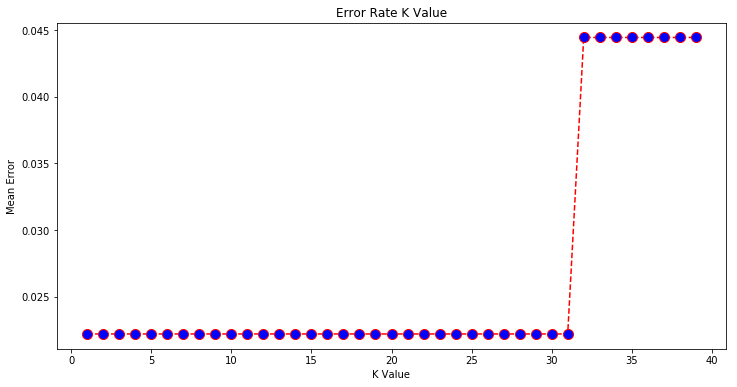

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training samples:

Using the Iris dataset, we can construct a tree as follows:

In [31]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
X, y = load_iris(return_X_y=True)
(pd.DataFrame(X)).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Once trained, you can plot the tree with the plot_tree function:

In [34]:
# from sklearn.tree import tree
# tree.plot_tree(clf)

evaluating model

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


## Boosting

Unlike many ML models which focus on high quality prediction done by a single model, boosting algorithms seek to improve the prediction power by training a sequence of weak models, each compensating the weaknesses of its predecessors.

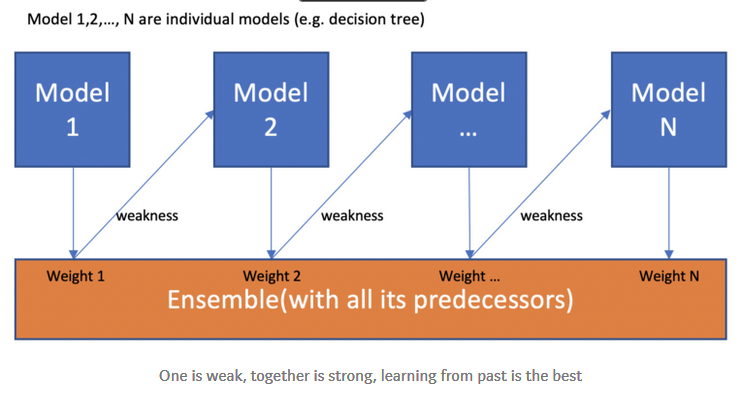

To understand Boosting, it is crucial to recognize that boosting is a generic algorithm rather than a specific model. Boosting needs you to specify a weak model (e.g. regression, shallow decision trees, etc) and then improves it.

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.990
Accuracy score (validation): 0.956
Learning rate:  0.075
Accuracy score (training): 0.990
Accuracy score (validation): 0.956
Learning rate:  0.1
Accuracy score (training): 0.990
Accuracy score (validation): 0.956
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.956
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.956
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.956
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.956
